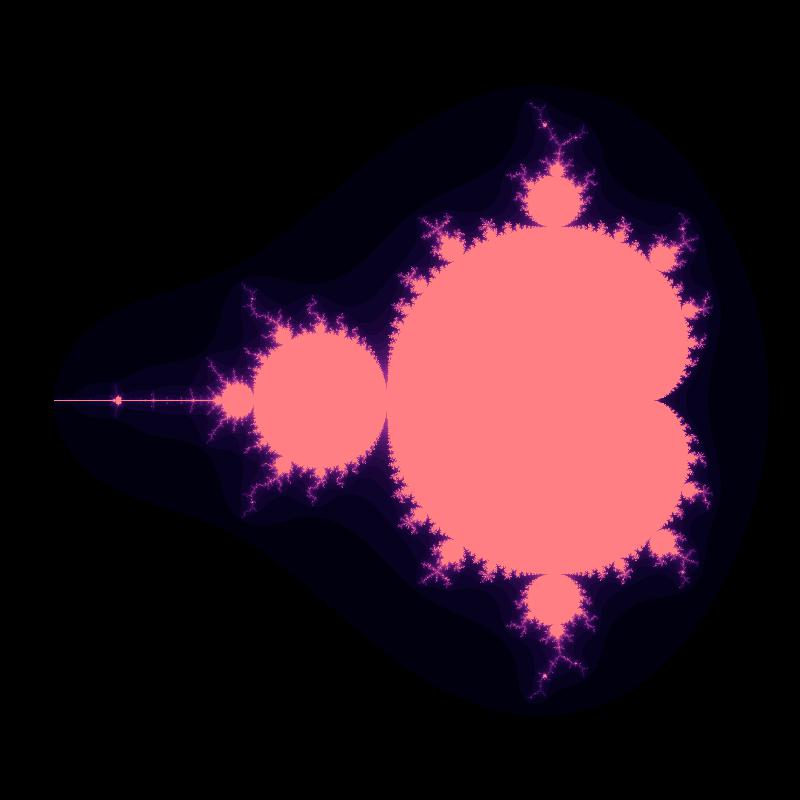

In [3]:
# imports and basic notebook setup
from io import BytesIO
import numpy as np
from PIL import Image as PILImage, ImageDraw
from IPython.display import Image as ipImage, display
import time

import math, colorsys

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PILImage.fromarray(a).save(f, fmt)
    display(ipImage(data=f.getvalue()))


dimensions = (800, 800)
scale = 1.0/(dimensions[0]/3)
center = (2.2, 1.5)
iterate_max = 500
colors_max = 250

img = PILImage.new("RGB", dimensions)
d = ImageDraw.Draw(img)

# Calculate a tolerable palette
palette = [0] * colors_max
for i in range(colors_max):
    f = 1-abs((float(i)/colors_max-1)**15)
    r, g, b = colorsys.hsv_to_rgb(.66+f/3, 1-f/2, f)
    palette[i] = (int(r*255), int(g*255), int(b*255))

# Calculate the mandelbrot sequence for the point c with start value z
def iterate_mandelbrot(c, z = 0):
    for n in range(iterate_max + 1):
        z = z*z+c
        if abs(z) > 2:
            return n
    return None

def mandelbrot():
    for y in range(dimensions[1]):
        for x in range(dimensions[0]):
            c = complex(x * scale - center[0], y * scale - center[1])

            n = iterate_mandelbrot(c)

            if n is None:
                v = 1
            else:
                v = n/float(iterate_max)
            try:
                d.point((x, y), fill = palette[int(v * (colors_max-1))])
            except:
                print(int(v * (colors_max-1)))

# Draw our image

start = time.time()
mandelbrot()
total += time.time() - start

del d
img.save("result_sequential.png")
showarray(img)

In [1]:
def mandelbrot (xdim, ydim, resolution, c, max_iters=20):
    x, y = numpy.ogrid[min(xdim):max(xdim):resolution*1j, min(xdim):max(xdim):resolution*1j]
    z = x + y*1j
    return mandelbrot_z((z, c, max_iters))

def mandelbrot_z (arg):
    import numpy as np
    z, c, max_iters = arg
    c = np.zeros(z.shape) + c
    mask = np.ones_like(z, dtype=np.bool)
    img = np.zeros_like(z, dtype=np.int32)
    zn = np.zeros_like(z)
    for i in range(max_iters):
        zn[mask] = z[mask]**2 + c[mask]
        mask[mask] = (abs(abs(z[mask]) - abs(zn[mask])) < 2)
        img[mask] = i
        z[mask] = zn[mask]
        
    z = z**2 + c                       
    z = z**2 + c
    img = img + 2 - np.log(np.log(abs(z) + 1))/np.log(2)
    
    return img
def chunks (l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

def pmandelbrot (dx, dy, resolution, c, max_iters):
    yresolution = (max(dy)-min(dy)) * resolution
    xresolution = (max(dx)-min(dx)) * resolution
    x, y = numpy.ogrid[min(dx):max(dx):xresolution*1j, min(dy):max(dy):yresolution*1j]
    z = x + y*1j
    z = z[:]
    oshape = z.shape
    
    img = numpy.concatenate(([mandelbrot_z((zz, c, max_iters)) for zz in chunks(z, 4)]))
    return img


from datetime import datetime
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy

s = datetime.now()
c = -0.70176-0.3842j
dx=(-1.8, 1.8)
dy=(-1.6, 1.6)
img = pmandelbrot (dx, dy, 1000, c, 100)


img = numpy.log(1+img)
img[img <= 1] = 1

print ("Took", datetime.now() - s)

plt.figure(figsize=(10,10))
plt.imsave('map%s.png' % c, img, cmap=cm.gray)
plt.imshow(img, interpolation='nearest', cmap=cm.RdGy_r)


Took 0:00:13.446304
